# Hopf bifurcation:

Consider the system:

$$
\dot{x} = \mu x - y + x y^{2}, \qquad 
\dot{y} = x + \mu y + y^{3}.
$$

- Show that a Hopf bifurcation occurs at the origin as $\mu$ varies.  

- Is the bifurcation subcritical, supercritical, or degenerate?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Phase portraits:

In [2]:
def f_ode(t, pair, mu):

    x, y = pair

    return [mu*x - y + x*y*y, x + mu*y + y**3]

In [3]:
# vector field grid
x = np.linspace(-1.5, 1.5, 50)
y = np.linspace(-1.5, 1.5, 50)

x_2d, y_2d = np.meshgrid(x, y)

In [4]:
def plot_phase(mu, ax):
    
    U = mu*x_2d - y_2d + x_2d*y_2d**2
    V = x_2d + mu*y_2d + y_2d**3

    speed = np.sqrt(U**2 + V**2)

    ax.streamplot(x_2d, y_2d, U, V, density=1, arrowsize=1, color = "green")
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('x'); ax.set_ylabel('y')
    ax.set_aspect('equal', 'box')
    ax.set_title(rf'Phase portrait, $\mu$ = {mu}')

    # Plot trajectories from several initial conditions
    theta = np.linspace(0, 2*np.pi, 12, endpoint=False)

    # Initial conditions (ics)
    ics = [ (0.05*np.cos(th), 0.05*np.sin(th)) for th in theta] + [(0.5,0.1), (-0.8,0.2), (0.2,-0.7), (0.4,0.4)]
    
    # Time vector:
    tspan = (0, 200) if mu>0 else (0, 200)
    
    # Numerical integration:
    for p0 in ics:
        sol = solve_ivp(lambda t, p: f_ode(t,p,mu), [0, 180], p0, max_step=0.4, rtol=1e-6)
        ax.plot(sol.y[0], sol.y[1], '--', lw=1)

    # Add (0,0)
    ax.plot(0,0,'ko', label='origin')

    # Add unstable limit cycle radius sqrt(-2 mu) for mu<0
    if mu < 0:
        r_pred = np.sqrt(-2*mu)
        th = np.linspace(0,2*np.pi,100)
        ax.plot(r_pred*np.cos(th), r_pred*np.sin(th), 'r-', lw=2, label=f'Unstable limit cycle r={r_pred:.3f}')
        ax.legend()

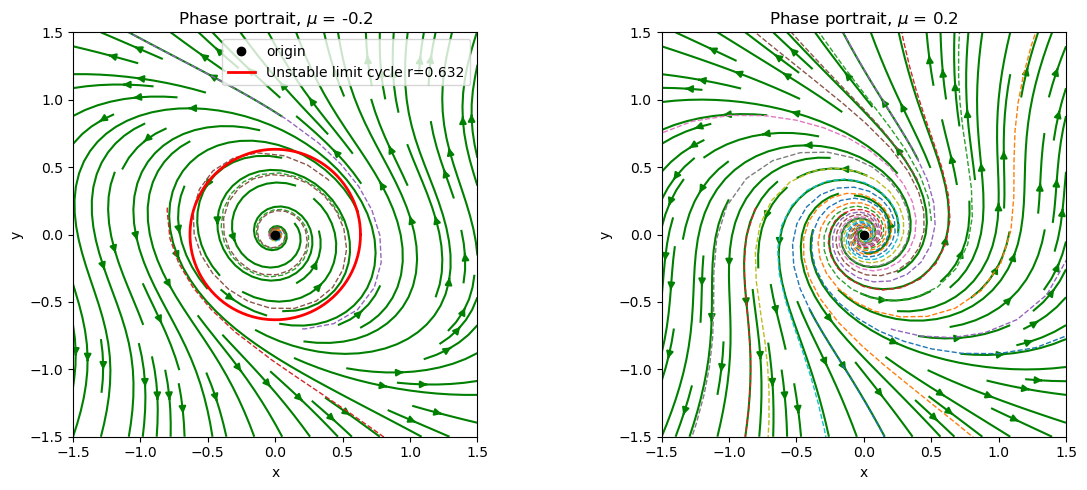

In [5]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
plot_phase(-0.2, axes[0])
plot_phase(0.2, axes[1])
plt.tight_layout()
plt.show()
